In [1]:
import pandas as pd
from Bio.SeqIO.FastaIO import SimpleFastaParser

In [2]:
lengs = []

with open("../databases/all_resfinder_db.fasta") as fd:
    for header, seq in SimpleFastaParser(fd):
        assert header not in lengs
        
        lengs.append([header, len(seq)])
    
# lengs

In [3]:
df_lengs = pd.DataFrame(lengs, columns=["sseqid", "seq_len"])
df_lengs

,sseqid,seq_len
0,aac(6')-Ib_2_M23634|aminoglycoside,606
1,aac(6')-Ib11_1_AY136758|aminoglycoside,570
2,aac(6')-30-aac(6')-Ib'_1_AJ584652|aminoglycoside,987
3,aac(6')-Iaj_1_AB709942|aminoglycoside,555
4,aac(6')-Ian_1_AP014611|aminoglycoside,573
...,...,...
3141,dfrA17_10_AM937244|trimethoprim,474
3142,dfrA34_1_JYRF01000065|trimethoprim,588
3143,dfrA36_1_CP038791|trimethoprim,588
3144,dfrA35_1_CP024557|trimethoprim,513


In [4]:
example = "../results_metaspades/cc4_1/blastn_resfinder/cc4_1_blast.out"

In [5]:
blast_cols = ["qseqid",
"sseqid",
"pident",
"length",
"mismatch",
"gapopen",
"qstart",
"qend",
"sstart",
"send",
"evalue",
"bitscore",
"qcovs",
"qcovhsp",]

In [6]:
rawdf = pd.read_csv(example, sep="\t", names=blast_cols)
print(rawdf.shape)
df = pd.merge(rawdf, df_lengs, how="left", on="sseqid")
print(df.shape)
df.head()


(26, 14)
(26, 15)


,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,qcovs,qcovhsp,seq_len
0,NODE_443_length_26917_cov_6.073212,tmexD2_1_MN175502|tetracycline,100.000,42,0,0,2582,2623,1210,1251,1.570000e-13,78.7,0,0,3135
1,NODE_443_length_26917_cov_6.073212,tmexD4_1_CP091084|tetracycline,97.619,42,1,0,2582,2623,1210,1251,7.290000e-12,73.1,0,0,3135
2,NODE_443_length_26917_cov_6.073212,tmexD3_1_LC633285|tetracycline,97.619,42,1,0,2582,2623,1210,1251,7.290000e-12,73.1,0,0,3135
3,NODE_443_length_26917_cov_6.073212,tmexD1_1_MK347425|tetracycline,97.619,42,1,0,2582,2623,1210,1251,7.290000e-12,73.1,0,0,3135
4,NODE_535_length_24375_cov_6.481892,tmexD2_1_MN175502|tetracycline,95.455,44,2,0,2404,2447,1251,1208,2.380000e-11,71.3,0,0,3135


In [7]:
df["ratio_len"] = df.apply(lambda x: 100*(x["length"]/x["seq_len"]), axis=1)

# new_cols = ["qseqid", "sseqid", "seq_len", "ratio_len"]+["pident","length","mismatch","gapopen",
#                               "qstart","qend","sstart","send","evalue",
#                               "bitscore","qcovs","qcovhsp"]

# df = df.loc[:, new_cols]
print(df.shape)
df.head()

(26, 16)


,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,qcovs,qcovhsp,seq_len,ratio_len
0,NODE_443_length_26917_cov_6.073212,tmexD2_1_MN175502|tetracycline,100.000,42,0,0,2582,2623,1210,1251,1.570000e-13,78.7,0,0,3135,1.339713
1,NODE_443_length_26917_cov_6.073212,tmexD4_1_CP091084|tetracycline,97.619,42,1,0,2582,2623,1210,1251,7.290000e-12,73.1,0,0,3135,1.339713
2,NODE_443_length_26917_cov_6.073212,tmexD3_1_LC633285|tetracycline,97.619,42,1,0,2582,2623,1210,1251,7.290000e-12,73.1,0,0,3135,1.339713
3,NODE_443_length_26917_cov_6.073212,tmexD1_1_MK347425|tetracycline,97.619,42,1,0,2582,2623,1210,1251,7.290000e-12,73.1,0,0,3135,1.339713
4,NODE_535_length_24375_cov_6.481892,tmexD2_1_MN175502|tetracycline,95.455,44,2,0,2404,2447,1251,1208,2.380000e-11,71.3,0,0,3135,1.403509


In [8]:
c1 = df["gapopen"] <= 10
c2 = df["mismatch"]/df["length"] < 0.10

c3 = df["pident"] > 85

c4 = df["length"] < 1000

c5 = df["ratio_len"] > 1



df = df[c5]
df

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,qcovs,qcovhsp,seq_len,ratio_len
0,NODE_443_length_26917_cov_6.073212,tmexD2_1_MN175502|tetracycline,100.000,42,0,0,2582,2623,1210,1251,1.570000e-13,78.7,0,0,3135,1.339713
1,NODE_443_length_26917_cov_6.073212,tmexD4_1_CP091084|tetracycline,97.619,42,1,0,2582,2623,1210,1251,7.290000e-12,73.1,0,0,3135,1.339713
2,NODE_443_length_26917_cov_6.073212,tmexD3_1_LC633285|tetracycline,97.619,42,1,0,2582,2623,1210,1251,7.290000e-12,73.1,0,0,3135,1.339713
3,NODE_443_length_26917_cov_6.073212,tmexD1_1_MK347425|tetracycline,97.619,42,1,0,2582,2623,1210,1251,7.290000e-12,73.1,0,0,3135,1.339713
4,NODE_535_length_24375_cov_6.481892,tmexD2_1_MN175502|tetracycline,95.455,44,2,0,2404,2447,1251,1208,2.380000e-11,71.3,0,0,3135,1.403509
5,NODE_6293_length_7008_cov_4.660655,OqxB_1_EU370913|quinolone,79.668,482,82,11,2184,2657,1507,1034,7.890000e-91,333.0,7,7,3153,15.287028
6,NODE_6293_length_7008_cov_4.660655,tmexD2_1_MN175502|tetracycline,72.973,518,125,13,2195,2703,1496,985,8.470000e-41,167.0,7,7,3135,16.523126
7,NODE_6293_length_7008_cov_4.660655,tmexD4_1_CP091084|tetracycline,74.272,412,91,13,2301,2703,1390,985,1.420000e-38,159.0,6,6,3135,13.141946
8,NODE_6293_length_7008_cov_4.660655,tmexD3_1_LC633285|tetracycline,74.129,402,89,13,2311,2703,1380,985,2.370000e-36,152.0,6,6,3135,12.822967
9,NODE_6293_length_7008_cov_4.660655,tmexD1_1_MK347425|tetracycline,74.129,402,89,13,2311,2703,1380,985,2.370000e-36,152.0,6,6,3135,12.822967


<Axes: xlabel='pident', ylabel='gapopen'>

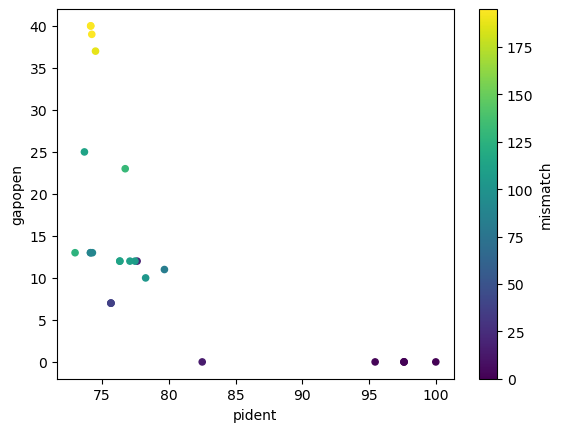

In [9]:
df.plot.scatter("pident", "gapopen", c = "mismatch", colormap="viridis")

<Axes: xlabel='pident', ylabel='mismatch'>

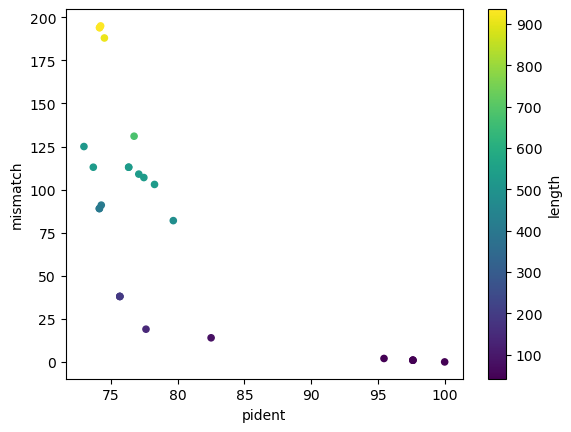

In [10]:
df.plot.scatter("pident", "mismatch", c = "length", colormap="viridis")

In [11]:
c1 = df["gapopen"] <= 10
c2 = df["mismatch"]/df["length"] < 0.10

c3 = df["pident"] > 85

c4 = df["length"] < 1000



df = df[c3 & c4]



<Axes: xlabel='pident', ylabel='gapopen'>

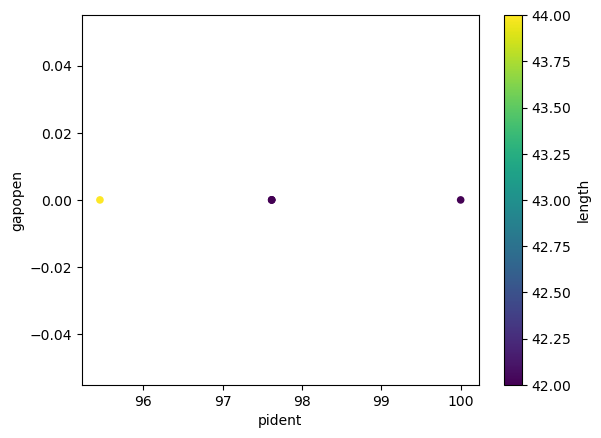

In [12]:
df.plot.scatter("pident", "gapopen", c = "length", colormap="viridis")

<Axes: xlabel='pident', ylabel='mismatch'>

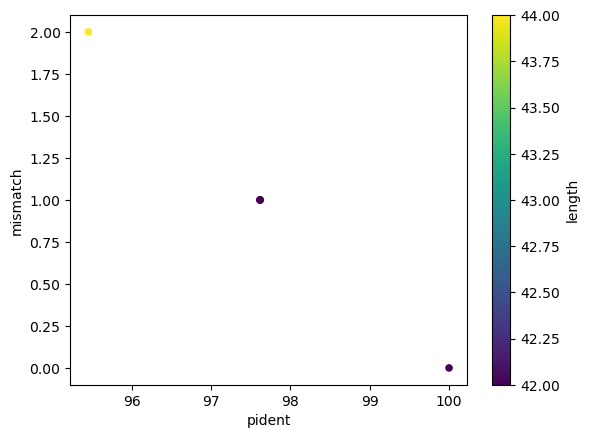

In [13]:
df.plot.scatter("pident", "mismatch", c = "length", colormap="viridis")

<Axes: xlabel='mismatch', ylabel='gapopen'>

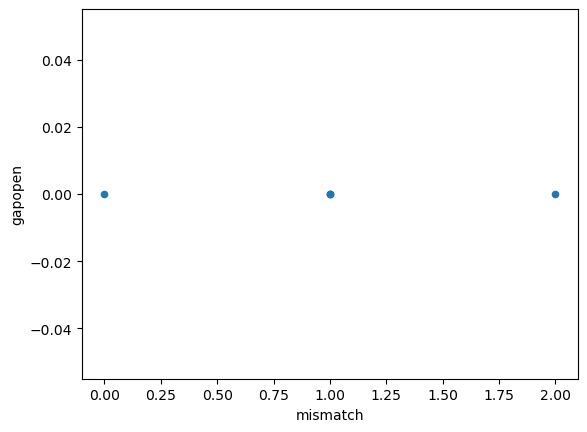

In [14]:
df.plot.scatter("mismatch", "gapopen")

In [15]:

print(df.shape)
df.head()

(5, 16)


,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,qcovs,qcovhsp,seq_len,ratio_len
0,NODE_443_length_26917_cov_6.073212,tmexD2_1_MN175502|tetracycline,100.000,42,0,0,2582,2623,1210,1251,1.570000e-13,78.7,0,0,3135,1.339713
1,NODE_443_length_26917_cov_6.073212,tmexD4_1_CP091084|tetracycline,97.619,42,1,0,2582,2623,1210,1251,7.290000e-12,73.1,0,0,3135,1.339713
2,NODE_443_length_26917_cov_6.073212,tmexD3_1_LC633285|tetracycline,97.619,42,1,0,2582,2623,1210,1251,7.290000e-12,73.1,0,0,3135,1.339713
3,NODE_443_length_26917_cov_6.073212,tmexD1_1_MK347425|tetracycline,97.619,42,1,0,2582,2623,1210,1251,7.290000e-12,73.1,0,0,3135,1.339713
4,NODE_535_length_24375_cov_6.481892,tmexD2_1_MN175502|tetracycline,95.455,44,2,0,2404,2447,1251,1208,2.380000e-11,71.3,0,0,3135,1.403509


In [16]:
df.mean()

/tmp/ipykernel_204377/3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


pident       9.766240e+01
length       4.240000e+01
mismatch     1.000000e+00
gapopen      0.000000e+00
qstart       2.546400e+03
qend         2.587800e+03
sstart       1.218200e+03
send         1.242400e+03
evalue       9.165400e-12
bitscore     7.386000e+01
qcovs        0.000000e+00
qcovhsp      0.000000e+00
seq_len      3.135000e+03
ratio_len    1.352472e+00
dtype: float64

Lets explore how many matches have each arg

In [17]:
grp = df.groupby(by=["arg"]).count().reset_index()
grp

KeyError: 'arg'

Lets get all ther args, that had a unique match

In [ ]:
# Get unique args
arg_unique_matches = list(grp[grp["qseqid"] == 1].arg.unique())

# Subset the DF based on the obtained unique args
df_arg_unique = df[df["arg"].isin(arg_unique_matches)]

# Sort the resulting DF based on the percentage of identical match
df_arg_unique.sort_values(by="pident", ascending=False)


In the following dataframe, there are all the ARG that match more than one time on the same contig.
As we can see, we have about 10% of this occurrences.

In [ ]:
grp_couple = df.groupby(by=["qseqid", "arg"]).count().reset_index()
grp_couple

In [ ]:

grp_multiple_matches = grp_couple[grp_couple["qstart"] > 1]

arg_multiple_matches = list(grp_multiple_matches.arg.unique())
grp_multiple_matches

In [ ]:
df[df["arg"] == "MEG_4"]

In [ ]:
df[df["arg"].isin(arg_multiple_matches)].loc[:, :]